In [1]:

# to display images in jupyter notebook

import matplotlib.pyplot as plt

def show_image(img):
    # Convert BGR to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display image using matplotlib
    plt.imshow(img_rgb)
    plt.axis('off')  
    plt.show()

 

In [2]:

import sys
import os
import cv2
import numpy as np
 

In [3]:

# Define locations
in_folder  = "./test-remove-gb"
out_folder = "/mnt/dysk_roboczy/efarell/repos/bg-test-output3"
test_image = "4720-malignant-4c-762-773-803-Philips-4720.jpg"

# Ensure output folder exists
if not os.path.exists(out_folder):
    os.makedirs(out_folder)

 

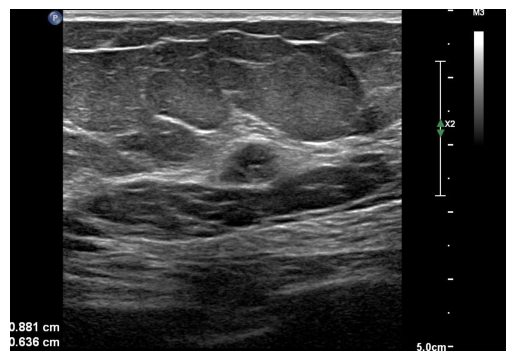

In [4]:


orig = cv2.imread(os.path.join(in_folder, test_image))
img  = orig.copy()
H, W = img.shape[:2]

show_image(orig)
 

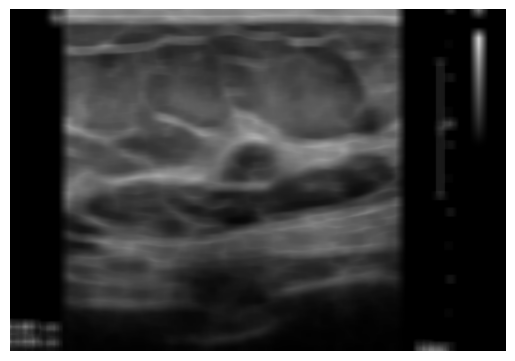

In [5]:


# Convert image to grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# remove noise
img = cv2.GaussianBlur(img, (21, 21), 21)
img = cv2.erode(img, np.ones((5, 5)))

show_image(img)

 

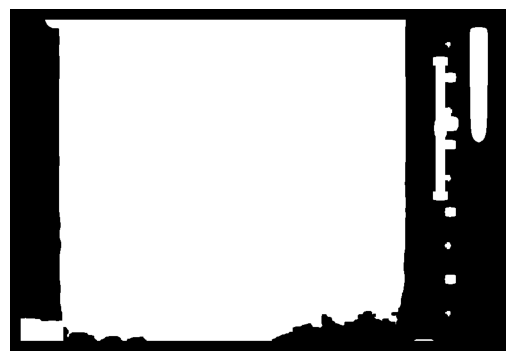

In [6]:


# remove horizantal line
# img = cv2.GaussianBlur(img, (5, 0), 21)

blr = img.copy()

# make binary image
img = cv2.threshold(img, 5, 255, cv2.THRESH_BINARY)[1]

# draw black border around image to better detect blobs:
cv2.rectangle(img, (0, 0), (W, H), 0, thickness=W//25)

show_image(img)

 

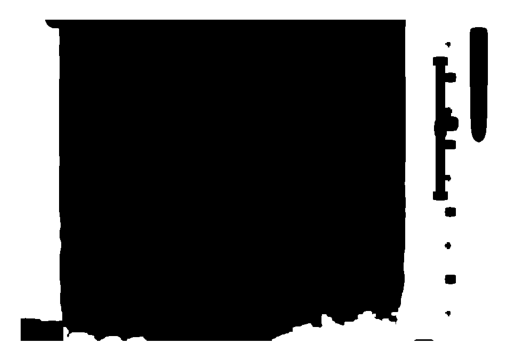

In [7]:

bw = img.copy()

# Invert black and white colors
img = ~img

show_image(img)
 

In [8]:

# Find contours and sort them by width
cnts, _ = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

cnts = list(cnts)
cnts.sort(key=lambda x: cv2.boundingRect(x)[2], reverse=True)

# Change the type and channels of image copies
img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
bw  = cv2.cvtColor(bw,  cv2.COLOR_GRAY2BGR)
blr = cv2.cvtColor(blr, cv2.COLOR_GRAY2BGR)

# Find the *SECOND* biggest blob
x, y, w, h = cv2.boundingRect(cnts[1])
cv2.rectangle(orig, (x, y), (x + w, y + h), (128, 0, 255), 10)
cv2.rectangle(img,  (x, y), (x + w, y + h), (128, 255, 0), 10)
print(x, y, w, h)
 

19 19 724 604


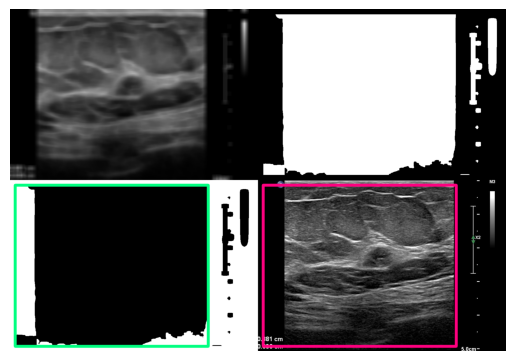

In [9]:


# Save final result
top = np.hstack((blr, bw))
btm = np.hstack((img, orig))

stacked = np.vstack((top, btm))

# cv2.imwrite(in_folder + '/img_.png', stacked)
show_image(stacked)


 